In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Prikaz prvih pet redova dataseta (kako bi vidjeli da se dataset pravilno učitao)

url = 'prices'
dataset = pd.read_csv(url, sep='\t', header=0)
dataset.head()

,product,currency,unit,indic_en,geo,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,6000,EUR,KWH,MSHH,AL,0.0000,0.0000,0.1152,0.1163,0.1156,0.1156,0.0812,0.0824,0.0844,0.0000,0.0920,0.0000
1,6000,EUR,KWH,MSHH,AT,0.1909,0.1967,0.1986,0.1975,0.2082,0.2021,0.2009,0.2034,0.1950,0.1966,0.2034,0.2111
2,6000,EUR,KWH,MSHH,BA,0.0000,0.0741,0.0745,0.0798,0.0803,0.0791,0.0812,0.0831,0.0859,0.0864,0.0873,0.0870
3,6000,EUR,KWH,MSHH,BE,0.1916,0.1959,0.2136,0.2327,0.2173,0.2097,0.2126,0.2544,0.2857,0.2824,0.2839,0.2792
4,6000,EUR,KWH,MSHH,BG,0.0823,0.0813,0.0826,0.0846,0.0924,0.0832,0.0942,0.0956,0.0955,0.0979,0.0997,0.0997


In [19]:
# Učitavanje podataka za odabranu zemlju [IT, HR, FR, UK, ES]

country = "UK"

total = dataset[dataset.geo == country]
households = total[total.indic_en == "MSHH"].to_numpy()
industry = total[total.indic_en == "MSIND"].to_numpy()

# Prebaci podatke u array

for i in households:
    array = i
    
for i in industry:
    array_ind = i

# Lokalne varijable

skip = [6000, 'EUR', 'KWH', 'MSHH', 'MSIND', country]
count = 0
sum = 0
prices = []
prices_ind = []

# Filtriraj array da ostanu samo vrijednosti cijena

for i in array:
    count = 0
    for j in skip:
        if i == j:
            break
        count += 1
        if count == len(skip):
            if isinstance(i,float):
                prices.append(i)
            elif isinstance(i, str):
                prices.append(float(i))
print("Households:", prices)

for i in array_ind:
    count = 0
    for j in skip:
        if i == j:
            break
        count += 1
        if count == len(skip):
            if isinstance(i,float):
                prices_ind.append(i)
            elif isinstance(i, str):
                prices_ind.append(float(i))
print("Industry:", prices_ind)

Households: [0.1466, 0.1386, 0.1433, 0.1682, 0.1741, 0.1918, 0.2125, 0.1951, 0.1766, 0.1887, 0.2122, 0.2203]
Industry: [0.1077, 0.0947, 0.0939, 0.1095, 0.1124, 0.1246, 0.1184, 0.1042, 0.0938, 0.097, 0.0998, 0.1065]


In [12]:
# Godine proučavanja kretanja cijene

years = []

for i in range(12):
    years.append(str(i+2009))

print(years)

['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


Text(0.5, 1.0, 'UK')

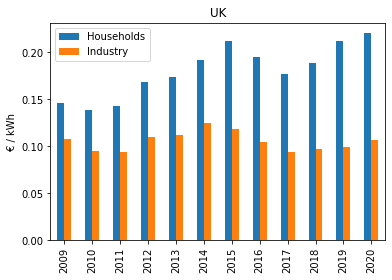

In [20]:
# Crtanje grafa koji prikazuje kretanje cijena električne energije u euru (2009-2020)

df = pd.DataFrame({'Households': prices,
                   'Industry': prices_ind}, index=years)
ax = df.plot.bar(stacked = False)
ax.set_ylabel("€ / kWh")
ax.set_title(country)

In [21]:
axx = ax.figure.savefig('uk.pdf')